In [1]:
import tensorflow as tf
from tensorflow import keras as tfk

# [Zolando's Fashion MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist)

### For our purposes we will be working on this data

In [2]:
# loading the data
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
X_train[0].shape
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm#:~:text=For%20a%20grayscale%20images%2C%20the,is%20taken%20to%20be%20white.

(28, 28)

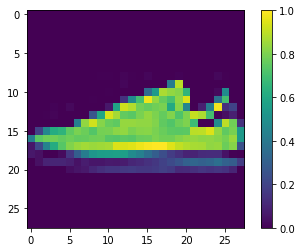

In [24]:
plt.imshow(X_train[6])
plt.colorbar()

In [8]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
classes= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

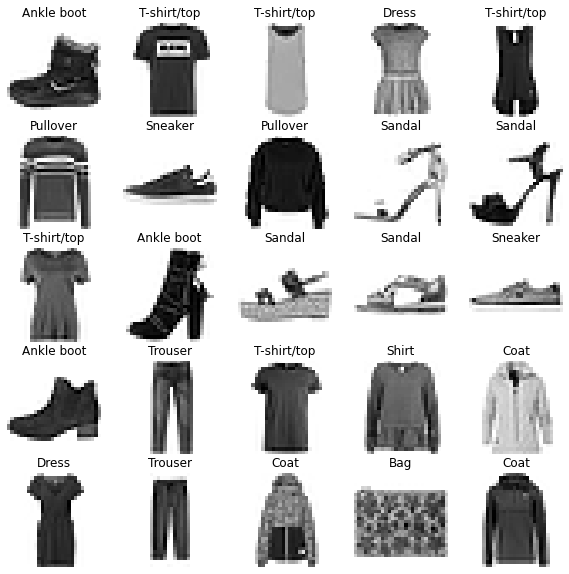

In [10]:
fig, ax = plt.subplots(5,5, figsize=(10,10))
for i in range(25):
  plot = ax[i//5, i%5]
  plot.imshow(X_train[i], cmap = 'binary')
  plot.axis('off')
  plot.set_title(classes[y_train[i]])

In [11]:
# set the scale between 0 and 1.
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Building the Neural Network
**This is MLP and not CNN**

In [13]:
model = tfk.models.Sequential([
                   tfk.layers.Flatten(input_shape=(28,28), name='ABC'),
                   tfk.layers.Dense(64, activation='relu'),
                   tfk.layers.Dense(32, activation='relu'),
                   tfk.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ABC (Flatten)                (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [15]:
# model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')

# rmsprop
# SGD - with or without momentum
# Adagrad
# Adam

In [16]:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [26]:
y_train[:5]



array([9, 0, 0, 3, 0], dtype=uint8)

In [17]:
a = model.fit(X_train, y_train, epochs=10) #, validation_data=(X_test, y_test)) #,  validation_split= 0.2)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5209 - accuracy: 0.8191
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3874 - accuracy: 0.8609
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8737
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3269 - accuracy: 0.8803
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3101 - accuracy: 0.8854
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8915
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2854 - accuracy: 0.8941
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.8984
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9000
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.255

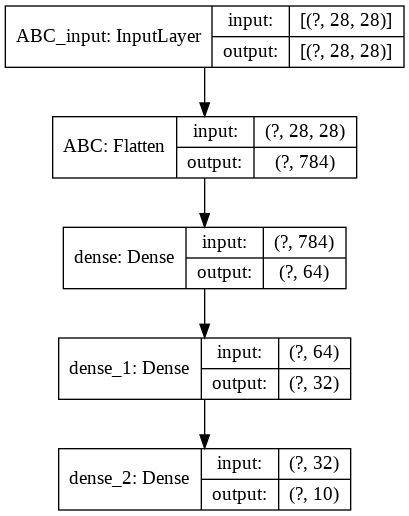

In [18]:
# visualising your model.
tf.keras.utils.plot_model(model, show_shapes=True) #, to_file='fmnist2.png')

In [19]:
## Saving the model:
#model.save('fmnist.h5')
#tf.keras.models.save_model(model, 'fmnist2.h5')

# loading the saved model
#fmnist2_model = tf.keras.models.load_model('fmnist2.h5')

a.history['accuracy']

[0.819100022315979,
 0.8608999848365784,
 0.8737166523933411,
 0.880299985408783,
 0.8853999972343445,
 0.8914666771888733,
 0.8941333293914795,
 0.8983500003814697,
 0.8999500274658203,
 0.9043333530426025]

**Training CNN**

In [20]:
tX = X_train.reshape((X_train.shape[0], 28, 28, 1))

In [21]:
tX.shape

(60000, 28, 28, 1)

In [ ]:
model = tfk.models.Sequential([
                   tfk.layers.Flatten(input_shape=(28,28), name='ABC'),
                   tfk.layers.Dense(64, activation='relu'),
                   tfk.layers.Dense(32, activation='relu'),
                   tfk.layers.Dense(10, activation='softmax')
])

In [22]:
# https://www.youtube.com/watch?v=go0gnM1TSrg

cnn_model = tfk.models.Sequential()
cnn_model.add(tfk.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.Flatten())
cnn_model.add(tfk.layers.Dense(100, activation='relu'))
cnn_model.add(tfk.layers.Dense(10, activation='relu'))

cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')
cnn_model.fit(tX, y_train, epochs=1, validation_split=0.2)

1500/1500 [==============================] - 259s 173ms/step - loss: 9.4376 - accuracy: 0.1579 - val_loss: 9.1877 - val_accuracy: 0.2683


In [29]:
(64*24*24) + 64

36928

In [27]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               3686500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 3,725,078
Trainable params: 3,725,078
Non-trainable params: 0
_________________________________________________________________


In [30]:
"""
Earlier model:
cnn_model = tfk.models.Sequential()
cnn_model.add(tfk.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.Flatten())
cnn_model.add(tfk.layers.Dense(100, activation='relu'))
cnn_model.add(tfk.layers.Dense(10, activation='relu'))

cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')
cnn_model.fit(tX, y_train, epochs=1, validation_split=0.2)

2 5
9 6

"""



cnn_model = tfk.models.Sequential()
cnn_model.add(tfk.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.Dropout(0.5))
cnn_model.add(tfk.layers.Flatten())
cnn_model.add(tfk.layers.Dense(100, activation='relu'))
cnn_model.add(tfk.layers.Dense(10, activation='relu'))

cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')
cnn_model.fit(tX, y_train, epochs=1, validation_split=0.2)

1500/1500 [==============================] - 68s 46ms/step - loss: 2.5264 - accuracy: 0.1284 - val_loss: 2.3026 - val_accuracy: 0.1030


In [31]:
"""
Adding batch size and increasing the epochs
"""
cnn_model = tfk.models.Sequential()
cnn_model.add(tfk.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.Dropout(0.5))
cnn_model.add(tfk.layers.Flatten())
cnn_model.add(tfk.layers.Dense(100, activation='relu'))
cnn_model.add(tfk.layers.Dense(10, activation='relu'))

cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')
cnn_model.fit(tX, y_train, batch_size = 128, epochs=2, validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 61s 161ms/step - loss: 1.7270 - accuracy: 0.4604 - val_loss: 1.3959 - val_accuracy: 0.4853
Epoch 2/2
375/375 [==============================] - 60s 160ms/step - loss: 1.5506 - accuracy: 0.5086 - val_loss: 1.1920 - val_accuracy: 0.5490


In [36]:
"""
cnn_model = tfk.models.Sequential()
cnn_model.add(tfk.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.Dropout(0.5))
cnn_model.add(tfk.layers.Flatten())
cnn_model.add(tfk.layers.Dense(100, activation='relu'))
cnn_model.add(tfk.layers.Dense(10, activation='relu'))

cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')
cnn_model.fit(tX, y_train, batch_size = 128, epochs=2, validation_split=0.2)

"""


cnn_model = tfk.models.Sequential()
cnn_model.add(tfk.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Dropout(0.3))
cnn_model.add(tfk.layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(tfk.layers.MaxPool2D(pool_size=(2,2), strides=None))
cnn_model.add(tfk.layers.Dropout(0.3))
cnn_model.add(tfk.layers.Conv2D(128,(3,3), activation='relu'))
cnn_model.add(tfk.layers.Dropout(0.3))
cnn_model.add(tfk.layers.Flatten())
cnn_model.add(tfk.layers.Dense(100, activation='relu'))
cnn_model.add(tfk.layers.Dropout(0.4))
cnn_model.add(tfk.layers.Dense(10, activation='softmax'))

cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')
cnn_model.fit(tX, y_train, batch_size = 128, epochs=5, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 46s 122ms/step - loss: 0.8109 - accuracy: 0.6980 - val_loss: 0.4838 - val_accuracy: 0.8198
Epoch 2/5
375/375 [==============================] - 45s 121ms/step - loss: 0.5075 - accuracy: 0.8113 - val_loss: 0.3852 - val_accuracy: 0.8637
Epoch 3/5
375/375 [==============================] - 45s 121ms/step - loss: 0.4361 - accuracy: 0.8416 - val_loss: 0.3450 - val_accuracy: 0.8718
Epoch 4/5
375/375 [==============================] - 45s 120ms/step - loss: 0.3941 - accuracy: 0.8589 - val_loss: 0.3170 - val_accuracy: 0.8830
Epoch 5/5
375/375 [==============================] - 45s 120ms/step - loss: 0.3665 - accuracy: 0.8684 - val_loss: 0.3020 - val_accuracy: 0.8877
